In [116]:
# Import numpy and matplotlib
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from tqdm import trange

from IPython.display import YouTubeVideo

# Historical background: Brownian motion and the Langevin equation

* Observed and described by botanist Robert Brown in 1827
* Small particles in water appeared to move around randomly, and never come to complete rest
* Described by Einstein (1905) in terms of molecular kinetic theory of heat
* Described by Langevin (1908) by what is essentially a stochastic differential equation

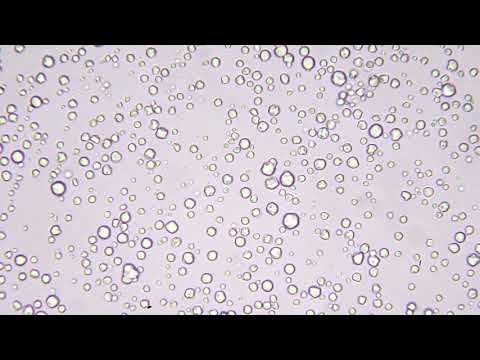

In [117]:
YouTubeVideo('NSe3TFLYcO8', width=560, height=315)

## Illustration of Brownian motion (not to scale)
![Illustration of Brownian motion](fig/brownian.gif)

# Einstein's model for Brownian motion (random walk)


<div style="width:100%;align:center;text-align:center">
<img src="fig/einstein_1.png" alt="Drawing" style="width: 750px;"/>


    --------------------------------------------------------------------

<img src="fig/einstein_2.png" alt="Drawing" style="width: 750px;"/>
</div>


Einstein predicted that the mean square displacement of spherical particles of radius $r$ in a fluid with viscosity $\mu$ would scale linearly with $t$ as shown:

$$ \left\langle \big(x(t) - x_0\big)^2 \right\rangle = 2Dt, \;\; \mathrm{where} \;\; D = \frac{k_B T}{6\pi \mu r}$$


__Assumption__: we look at an interval $t$ which is long enough that the displacements of a single particle during two consecutive intervals can be assumed mutually independent.

Measuring the mean square displacement allows one to calculate Bolzmann's constant, $k_B$, and thus Avogadro's number, $N_A = R/k_B$.

We have seen previously that the mean square displacement of the Wiener process increases linearly in time, and in particular, for the SDE

$$ \mathrm{d} X = \sqrt{2 D} \, \mathrm{d} W_t $$

we have that $ \left\langle \big(x(t) - x_0\big)^2 \right\rangle = 2Dt $.

# Measurements done by Perrin (1909)

* Drawing of the path of three particles undergoing Brownian motion
* Positions recorded every 30 seconds
* Average length of a segment is about 9 microns
* Perrin's results seen as quite solid proof for "the atomic theory", which was still debated at the time


<div style="align:center">
<img src="fig/perrin.png" alt="Drawing" style="width: 550px;"/>
</div>

# The Langevin equation (random flight)

Langevin wrote down an equation for Brownian motion, aiming to also describe short timescales (Langevin, 1908). His equation is Newton's 2nd law for a spherical particle in a liquid, with Stokes' drag and a random force:

$$ m \frac{\mathrm{d}^2 x}{\mathrm{d} t^2} = - 6 \pi \mu r \frac{\mathrm{d} x}{\mathrm{d} t} + X. $$

"_About the complementary force $X$, we know that it is indifferently positive and negative and that its magnitude is such that it maintains the agitation of the particle, [...]_"

Langevin then uses a few tricks, as well as the fact that the average kinetic energy should be $\frac{1}{2}k_b T$ for each direction, and works out that for long timescales

$$  \frac{\bar{\mathrm{d} x^2}}{\mathrm{d} t} = \frac{RT}{N} \frac{1}{3 \pi \mu a},$$

where the bar means ensemble average and $a$ is the particle radius. If we use that $k_B = R/N$, we end up with the same result as Einstein, which we saw above.

* The Langevin equation was one of the first examples of what is now known as a Stochastic Differential Equation (SDE)
* The theory of SDEs was only properly developed in the 1940s, by Itô and others.
* In modern notation, we can give a precise mathematical meaning to the random force, $X$, in the Langevin equation.

A note on terminology: The term "Langevin equation" is now used much more generally, for SDEs describing randomly varying degrees of freedom in systems whose average properties change slowly (see, e.g., Coffey et al. 2004)

### The Langevin equation in modern notation

In modern SDE notation (which did not exist in 1908), we would write the Langevin equation as two coupled SDEs, for velocity $v$ and position $x$:

\begin{align}
    \mathrm{d} v &= -\frac{6 \pi \mu r v}{m} \; \mathrm{d} t +  b(x, v, t) \, \mathrm{d} W_t, \nonumber \\
    \mathrm{d} x &= v \, \mathrm{d} t \nonumber,
\end{align}

though we still need to figure out what the prefactor $b$ to the noise term should be. We'll get back to this point.

## Summary: Random walk and random flight with constant coefficients

What we have seen above is a brief historical background on two types of transport models, which are sometimes called "random walk" and "random flight". Random walk models are also sometimes called AR0 (Auto-regressive 0) models, since they have no memory in their displacements, while random flight models are called AR1, since they have "one level" of memory (they remember their velocity). Similarly, there are also models called AR2 models, which would described by three coupled SDEs where the acceleration changes by random amounts, and velocity and position follow.

Even though the motivation we have looked at was to describe the Brownian motion of particles suspended in water, these models are applied to many other things as well, including pure molecular diffusion, and mixing in turbulent fluids.

To summarise:

#### SDE for random walk

$$ \mathrm{d} x = \sqrt{2 D} \, \mathrm{d} W_t $$

$D$ is the diffusivity with units m$^2$/s.


#### SDE for Random flight

\begin{align}
    \mathrm{d} v &= - \frac{1}{\tau}v \; \mathrm{d} t +  \sqrt{\frac{2\sigma^2}{\tau}} \, \mathrm{d} W_t \nonumber \\
    \mathrm{d} x &= v \, \mathrm{d} t. \nonumber
\end{align}

Here, $\tau$ is the time scale for decay of the velocity (decorrelation time), $\sigma$ is a velocity scale (both assumed constant).

## Variable coefficients

We have already seen that for a random-walk type SDE to be consistent with the diffusion equation when the diffusivity is a function of space, we need an extra term:

### SDE for random walk with spatially variable diffusivity

$$ \mathrm{d} x = \frac{\partial D(x)}{\partial x} \, \mathrm{d}t +  \sqrt{2 D} \, \mathrm{d} W_t $$


Similarly, we need an extra term in the random flight model:

### SDE for Random flight with spatially variable  velocity fluctuations

Here we let $\sigma(x)$ be a function of position, while $\tau$ is still assumed constant:

\begin{align}
    \mathrm{d} v &= - \frac{1}{\tau}v \; \mathrm{d} t + \frac{1}{2}\frac{\partial \,\sigma^2}{\partial x}\left(1 + \frac{v^2}{\sigma^2}\right) \, \mathrm{d} t + \sqrt{\frac{2\sigma^2}{\tau}} \, \mathrm{d} W_t \nonumber \\
    \mathrm{d} x &= v \, \mathrm{d} t \nonumber
\end{align}

Note that in both cases, we recover the special cases if the coefficients are indeed constant.

In [168]:
# An SDE solver
def EM(X, t, dt, a, b, dW=None):
    # Euler-Maruyama method, with drift a(X, t) and diffusion b(X, t)
    # Unless provided, generate random dW, Gaussian with mean=0 and variance=dt
    # and the correct number of elements
    if dW is None:
        dW = np.random.normal(loc=0, scale=np.sqrt(dt), size=X.shape)
    # Calculate and return next value
    return X + a(X, t)*dt + b(X, t)*dW

def solve_SDE(X0, tmax, dt, a, b, solver, boundary=None, W=None):
    # A simple solve function (assumes dt evenly divides tmax)
    # Calculate number of timsteps (including 0 and tmax)
    Nt = int(tmax/dt) + 1
    # If X0 is not an array, turn it into a 1-element array
    if not isinstance(X0, np.ndarray):
        X0 = np.array([X0])
    # Arrays to track solution
    X = np.zeros((Nt, *X0.shape))
    X[0,:] = X0
    t = 0
    for n in trange(1, Nt):
        # Call solver, with pre-computed W if available
        if W is None:
            X[n,:] = solver(X[n-1,:], t, dt, a, b)
        else:
            # Obtain increment from pre-computed Wt
            dW = W[n] - W[n-1]
            X[n,:] = solver(X[n-1,:], t, dt, a, b, dW=dW)
        if boundary is not None:
            X[n,:] = boundary(X[n,:])
        t += dt
    return X

## Comparing random walk and random flight

Below, we compare some aspects of random walk and random flight models with constant coefficients.

In [176]:
# Diffusivity for random walk
K0 = 0.1
# Decorrelation time and velocity flucutation scale for random flight
tau = 0.01
sigma = 1.0

def a_rw(X, t):
    return 0.0

def b_rw(X, t):
    return np.sqrt(2*K0)

def a_rf(X, t):
    # Assuming that X has shape (2, Np), where:
    # X[0,:] = x is position
    # X[1,:] = v is velocity
    a_ = np.array([
        X[1,:], # dx = v dt
        -(1/tau)*X[1,:],
    ])
    return a_

def b_rf(X, t):
    # Assuming that X has shape (2, Np), where:
    # X[0,:] = x is position
    # X[1,:] = v is velocity
    b_ = np.zeros(X.shape)
    b_[1,:] = np.sqrt(2*sigma**2/tau)
    return b_

In [177]:
Np = 100
Tmax = 10
dt = 0.001

X0_rw = np.zeros(Np)
X0_rf = np.zeros((2, Np))

X_rw = solve_SDE(X0_rw, Tmax, dt, a_rw, b_rw, EM)
X_rf = solve_SDE(X0_rf, Tmax, dt, a_rf, b_rf, EM)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 43376.64it/s]


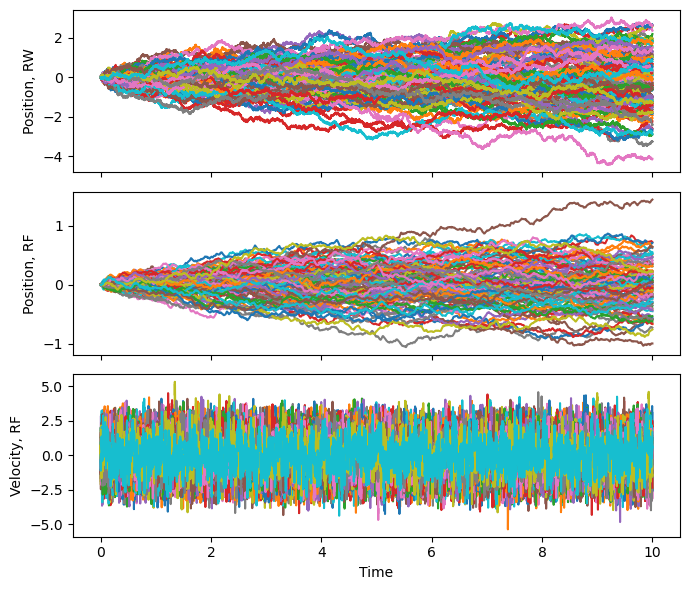

In [178]:
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(7,6))


t = np.linspace(0, Tmax, X_rw.shape[0])

ax[0].plot(t, X_rw)
ax[1].plot(t, X_rf[:,0,:])
ax[2].plot(t, X_rf[:,1,:])

ax[0].set_ylabel('Position, RW')
ax[1].set_ylabel('Position, RF')
ax[2].set_ylabel('Velocity, RF')
ax[2].set_xlabel('Time')

plt.tight_layout()

In [185]:
# Diffusivity for random walk
K0 = 0.1
# Decorrelation time and velocity flucutation scale for random flight
tau = 0.01
sigma = 1.0

def a_rw(X, t):
    return 0.0

def b_rw(X, t):
    return np.sqrt(2*K0)

def a_rf(X, t):
    # Assuming that X has shape (2, Np), where:
    # X[0,:] = x is position
    # X[1,:] = v is velocity
    a_ = np.array([
        X[1,:], # dx = v dt
        -(1/tau)*X[1,:],
    ])
    return a_

def b_rf(X, t):
    # Assuming that X has shape (2, Np), where:
    # X[0,:] = x is position
    # X[1,:] = v is velocity
    b_ = np.zeros(X.shape)
    b_[1,:] = np.sqrt(2*sigma**2/tau)
    return b_


Np = 100
Tmax = 100
dt = 0.001

X0_rw = np.zeros(Np)
X0_rf = np.zeros((2, Np))

X_rw = solve_SDE(X0_rw, Tmax, dt, a_rw, b_rw, EM)
X_rf = solve_SDE(X0_rf, Tmax, dt, a_rf, b_rf, EM)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:02<00:00, 41182.33it/s]


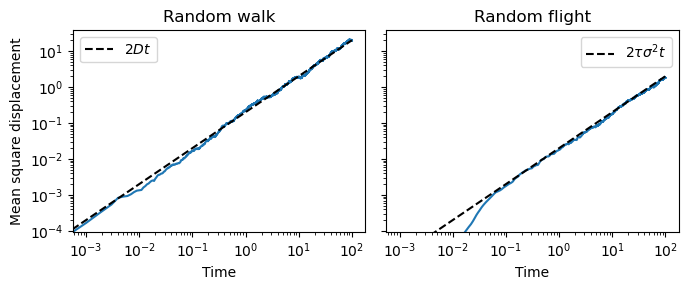

In [186]:
fig, ax = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(7,3))

t = np.linspace(0, Tmax, X_rw.shape[0])


ax[0].plot(t, np.var(X_rw, axis=1))
ax[1].plot(t, np.var(X_rf[:,0,:], axis=1))

ax[0].plot(t, 2*K0*t, '--', c='k', label='$2Dt$')
ax[1].plot(t, 2*tau*sigma**2*t, '--', c='k', label='$2 \\tau \sigma^2 t $')

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].legend()
ax[1].legend()

ax[0].set_ylabel('Mean square displacement')
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')

ax[0].set_title('Random walk')
ax[1].set_title('Random flight')

plt.tight_layout()

### Reflecting boundary conditions for random flight

Similarly as for the diffusion problems we have been looking at, it is not completely obvious how to implement reflecting boundary conditions for a random-flight type SDE. One option, which we will look at, is that for those particles that end up outside the boundary, we reflect the position, and flip the sign of the velocity.

See, e.g., Wilson & Flesch (1996) for some discussion on this point.

In [187]:
def reflect(X, xmin=0, xmax = 5):
    # Reflect as many times as needed, until all particles are inside
    while np.any((X[0,:] < xmin) | (X[0,:] > xmax)): # Note that | is shorthand for np.logical_or in this case
        mask = X[0,:] < xmin
        X[0,mask] = 2*xmin - X[0,mask] # reflect about boundary
        X[1,mask] = -X[1,mask] # flip sign of velocity
        mask = X[0,:] > xmax
        X[0,mask] = 2*xmax - X[0,mask] # reflect about boundary
        X[1,mask] = -X[1,mask] # flip sign of velocity
    return X

In [188]:
s0 = 1e-3
s1 = 2e-2
tau = 1

def s2(x, t):
    return s0 + s1*x

def ds2dx(x, t):
    return s1

def a(X, t):
    # Assuming that X has shape (2, Np), where:
    # X[0,:] = x is position
    # X[1,:] = v is velocity
    return np.array([
        X[1,:], # dxdt = v
        -X[1,:]/tau + 0.5*ds2dx(X[0,:], t) * (1+X[1,:]**2/s2(X[0,:], t)) # dvdx
    ])

def b(X, t):
    b_ = np.zeros_like(X)
    b_[1,:] = np.sqrt(2*s2(X[0,:], t)/tau)
    return b_
    

In [189]:
Np = 100
dt = 0.1
Tmax = 200

X0 = np.zeros((2, Np))
X0[0,:] = 2


X = solve_SDE(X0, Tmax, dt, a, b, EM, boundary=reflect)
t = np.linspace(0, Tmax, X.shape[0])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 13209.45it/s]


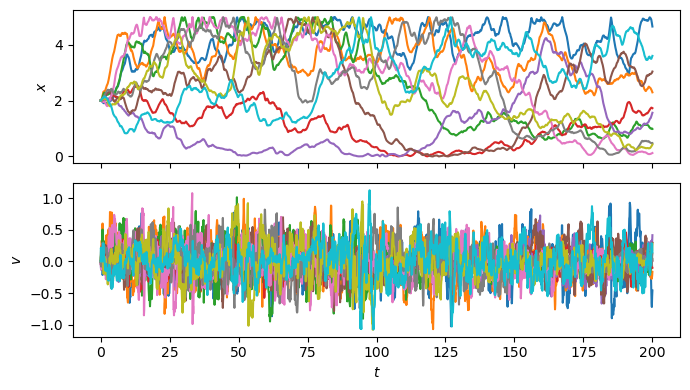

In [190]:
tskip = 1
pskip = 10

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(7,4))
ax[0].plot(t[::tskip], X[::tskip,0,::pskip])
ax[1].plot(t[::tskip], X[::tskip,1,::pskip])

ax[0].set_ylabel('$x$')
ax[1].set_ylabel('$v$')
ax[1].set_xlabel('$t$')
plt.tight_layout()

## Summary


### Random walk

* Consistent with the diffusion equation.
* Mean square displacement increases linearly in time.
* No meaningful  velocity: $\frac{x_{n+1}-x_n}{\Delta t} = \frac{\sqrt{2D} \; \Delta W_n}{\Delta t}$ becomes infinite as $\Delta t \to 0$.

(Note, though, that also the diffusion equation has infinitely fast transport.)

### Random flight

* Not consistent with the diffusion equation (but approximately consistent for long timescales).
* Mean square displacement increases linearly in time for $t \gg \tau$.
* Mean square displacement grows as $t^2$ on short timescales (ballistic regime).
* Velocity remains physically reasonable.


### A brief return to Langevin's unknown force, $X$

We saw that Einstein predicted 

$$ \left\langle \big(x(t) - x_0\big)^2 \right\rangle = 2Dt, \;\; \mathrm{where} \;\; D = \frac{k_B T}{6\pi \mu r}$$

and we recall that the deterministic term in the Langevin equation was 

$$ \frac{\mathrm{d}^2 x}{\mathrm{d} t^2} = - \frac{ 6 \pi \mu r}{m} \frac{\mathrm{d} x}{\mathrm{d} t}, $$

which means that the timescale for velocity decay in the random flight SDE would be

$$ \tau =  \frac{m}{ 6 \pi \mu r}. $$.


We also saw that in the random flight model described by $\tau$ and $\sigma$, we had that for long timescale, the MSD grew as $2 \tau \sigma^2 t$.

Putting this together:

$$ 2Dt = 2 \tau \sigma^2 t$$

$$ \Rightarrow \sigma = \sqrt{\frac{D}{\tau}} = \sqrt{\frac{k_B T}{m}},$$

and the Langevin equation in modern notation then becomes

\begin{align}
    \mathrm{d} v &= - \frac{6 \pi \mu r v}{m} \; \mathrm{d} t +  \frac{2}{m}\sqrt{3 \pi k_B T \mu r} \, \mathrm{d} W_t, \nonumber \\
    \mathrm{d} x &= V \, \mathrm{d} t \nonumber,
\end{align}

# References and suggested reading

* Einstein (1905), "On the movement of small particles suspened in stationary liquids required by the molecular-kinetic theory of heat", https://einsteinpapers.press.princeton.edu/vol2-trans/137
* Langevin (1908), "On the theory of Brownian motion", https://aapt.scitation.org/doi/10.1119/1.18725
* Perrin (1909), "Brownian movement and molecular reality", http://web.mit.edu/swangroup/footer/perrin_bm.pdf
* Wilson & Sawford (1996), "Review of Lagrangian stochastic models for trajectories in the turbulent atmosphere", https://link.springer.com/article/10.1007/BF00122492
* Coffey et al. (2005), _The Langevin Equation_, https://www.worldscientific.com/worldscibooks/10.1142/5343
* Rodean (1996), _Stochastic Lagrangian Models of Turbulent Diffusion_, https://link.springer.com/book/10.1007/978-1-935704-11-9
* Kloeden & Platen (1992), _Numerical Solution of Stochastic differential equations_, https://link.springer.com/book/10.1007/978-3-662-12616-5